## DATA 690 Homework 5 (50 points - Due on Sunday, October 16, 2022 by 11:00 pm ET)

The output of this assignment for submission should be in PDF format **AND** .py or .ipynb. The name of the file should be as follows: Lastname_Firstname_Homework5.pdf (example: Thomas_Sunela_Homework5.pdf) **AND** Lastname_Firstname_Homework5.ipynb (example: Thomas_Sunela_Assignment5.ipynb. In short, you are submitting the python notebook as well as the pdf of that notebook. Do **NOT** submit .html file, the system will give you an error.

    
Incorrect file name will cost you points!<br>

Instructions for converting a Jupyter Python notebook to PDF: Go to the menu and choose, File --> Download As --> html. Open that html file and print it to PDF. Submit the PDF file **NOT** the html file.

If you are using Google Colab, remember to review the PDF before submitting to ensure that all cells and answers are displayed in the PDF.

**Things to note:**

* Each cell should display an output
* Use both Markdown and code comments in the Jupyter Notebook as needed

# `tips`

Food servers' tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule

|Variable Name | Variable Meaning |
|---  |---                 |
| total_bill | Total bill (cost of the meal), including tax, in US dollars |
| tip | Tip (gratuity) in US dollars |
| sex | Sex of person paying for the meal (0=male, 1=female) |
| smoker | Smoker in party? (0=No, 1=Yes) |
| day | Day of Week (4=Thur, 5=Fri, 6=Sat, 7=Sun) |
| time | Dinner, Lunch |
|size  | Size of the party |

In [1]:
# Import necessary libraries, and modify DataFrame for convenience
import pandas as pd

tips = pd.read_csv('tips.csv')
tips['day'].replace({4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}, inplace = True)
tips['smoker'].replace({0:'No', 1:'Yes'}, inplace = True)
tips['sex'].replace({0:'Male', 1:'Female'}, inplace = True)
tips['tip_percent'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Male,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Female,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Female,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Female,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Male,No,Sun,Dinner,4,0.146808


### Exercise 1: (5 points)
<span  style="color:purple; font-size:16px">On which day of the week does the waiter serve the largest parties, on average? There are several ways to answer this question. Try to find at least two different solutions.</span>


In [22]:
# Answer 1

#Groups the Values by Day and size, find the average and sorts the value by size and returns the first row 
print("The Day of the week with largest parties on average:")
tips.groupby('day',as_index=False)['size'].mean().sort_values(by='size', ascending=False).head(1)


The Day of the week with largest parties on average:


,day,size
2,Sun,2.842105


In [108]:
# Answer 2

#Using groupby with aggregation function mean 
print("The Day of the week with largest parties on average:")
tips.groupby('day').agg({'size':'mean'}).sort_values(by='size', ascending=False).head(1)

The Day of the week with largest parties on average:


,size
day,
Sun,2.842105


### Exercise 2: (5 points)
<span  style="color:purple; font-size:16px">Calculate the average bill by day and time and round to 1 decimal place. What day-time combination has the highest average bill? What day-time combination has the lowest average bill?</span>


In [113]:
# Answer

#The average bill by day and time in ascending order by rounding to 1 decimal place
avg_bill_by_DayTime = tips.groupby(['day', 'time']).agg({'total_bill':'mean'}).sort_values(
    by='total_bill', ascending=False).round(1)
avg_bill_by_DayTime

total_bill
day  time              
Sun  Dinner        21.4
Sat  Dinner        20.4
Fri  Dinner        19.7
Thur Dinner        18.8
     Lunch         17.7
Fri  Lunch         12.8

In [119]:
print(f'Below day-time combination has the highest average bill: \n {avg_bill_by_DayTime.head(1)}')

Below day-time combination has the highest average bill: 
             total_bill
day time              
Sun Dinner        21.4


In [121]:
print(f'Below day-time combination has the lowest average bill: \n {avg_bill_by_DayTime.tail(1)}')

Below day-time combination has the lowest average bill: 
            total_bill
day time             
Fri Lunch        12.8


### Exercise 3: (5 points)
<span  style="color:purple; font-size:16px">Extract the average bill for Friday lunch from the result of Exercise 2. The result should be the actual rounded value. </span>

In [39]:
# Answer
# To Extract the average bill for Friday lunch
avg_bill_by_DayTime.loc[('Fri','Lunch')]


total_bill    12.8
Name: (Fri, Lunch), dtype: float64

In [123]:
print('Average bill for Friday lunch:')

#In One Line
tips.groupby(['day', 'time']).agg({'total_bill':'mean'}).sort_values(
    by='total_bill', ascending=False).round(1).loc[('Fri','Lunch')]

Average bill for Friday lunch:


total_bill    12.8
Name: (Fri, Lunch), dtype: float64

### Exercise 4: (5 points)
<span  style="color:purple; font-size:16px">Use `.groupby()` to make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?</span>

sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: tip_percent, dtype: object

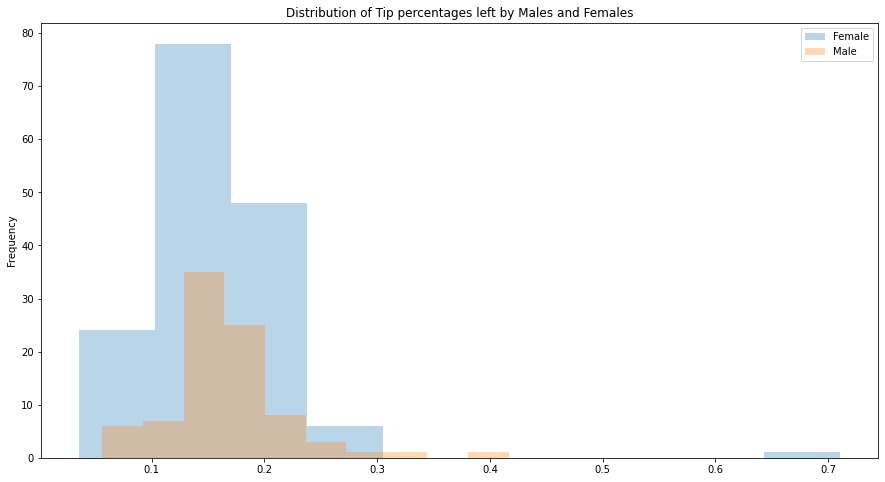

In [142]:
#Answer

#Using groupby() to make a visualization comparing the distribution of tip percentages left by males and females
tips.groupby(by='sex')['tip_percent'].plot(kind='hist',
                                            bins=10,
                                            alpha=0.3,
                                            legend=True,
                                            title = 'Distribution of Tip percentages left by Males and Females',
                                            figsize=(15,8),
                                            )

- From the above Visualization plot, We see Tip Percent left by Female is higher than the Tip Percent left by Male

### Exercise 5: (5 points)
<span  style="color:purple; font-size:16px">Calculate the average total bill by day, time, and party size. Display the results in a pivot table.</span>

In [137]:
# Answer

# Average total bill by day, time, and party size using the pivot table
tips.pivot_table(index=['day','time'],
                  columns= 'size',
                  values='total_bill',
                  aggfunc='mean'
                  )

size             1          2          3          4      5          6
day  time                                                            
Fri  Dinner    NaN  17.799091        NaN  40.170000    NaN        NaN
     Lunch    8.58  13.072000  15.980000        NaN    NaN        NaN
Sat  Dinner   5.16  16.837170  25.509444  29.876154  28.15        NaN
Sun  Dinner    NaN  17.560000  22.184000  26.688333  27.00  48.170000
Thur Dinner    NaN  18.780000        NaN        NaN    NaN        NaN
     Lunch   10.07  15.079787  19.160000  29.950000  41.19  30.383333

### Exercise 6: (5 points)
<span  style="color:purple; font-size:16px">Make a bar chart showing the average total bill by party size, day, and time. (Place party size on the $x$-axis)</span>

<AxesSubplot:title={'center':'Average total bill by Party size, Day, and Time'}, xlabel='size', ylabel='Total bill'>

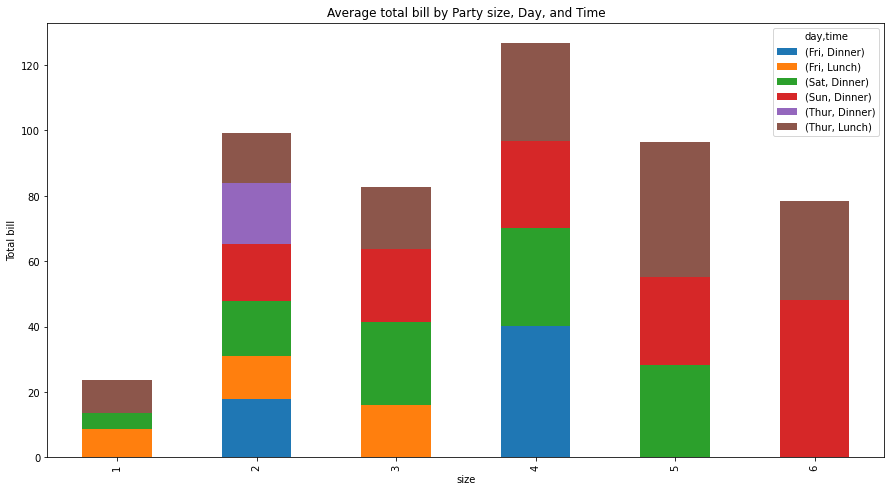

In [139]:
# Answer

#Bar chart showing the average total bill by party size, day, and time.
tips.pivot_table(index='size',
                  columns= ['day','time'],
                  values='total_bill',
                   aggfunc='mean'
                  ).plot(kind='bar',
                        title = 'Average total bill by Party size, Day, and Time',
                        ylabel= 'Total bill',
                        legend= True,
                        stacked=True,
                        figsize=(15,8))

### Exercise 7: (10 points)
<span  style="color:purple; font-size:16px">Make a bar chart showing the tip percent by party size, and day. (Place day on the $x$-axis, average `tip_percent` on the $y$-axis, and the bars colored by party `size`. Use `pivot_table()` to reshape the data appropriately.)</span>

<AxesSubplot:title={'center':'Tip percent by Party size and Day'}, xlabel='day', ylabel='Tip Percent'>

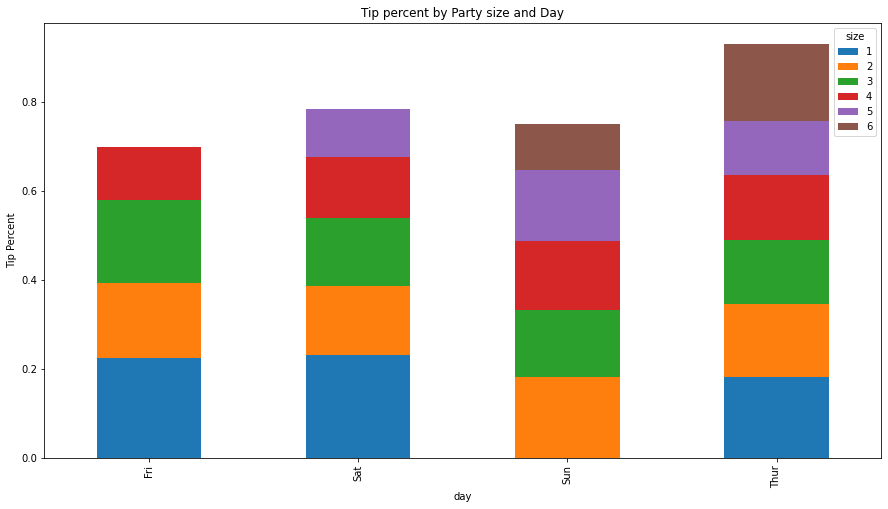

In [138]:
# Answer

#Bar chart showing the tip percent by party size, and day using pivot table
tips.pivot_table(index='day',
                  columns= 'size',
                  values='tip_percent',
                   aggfunc='mean'
                  ).plot(kind='bar',
                        legend= True,
                        title ='Tip percent by Party size and Day',
                        ylabel= 'Tip Percent',
                        stacked=True,
                        figsize=(15,8))

### Exercise 8: (10 points)
<span  style="color:purple; font-size:16px">Make a visualization that displays the conditional distribution of party size, given the day of the week.</span>

(Hint: use `crosstab()` to reshape the data appropriately with the days of the week as the index and the party size as the column. To obtain the *conditional* distributions, use the `normalize = 'index'` argument to normalize the distribution row-wise before passing the resulting data matrix to the `plot()` method.)

#### Conditional distribution of party size by the day of the week using crosstab()

In [64]:
# Answer
pd.crosstab(index=tips['day'],
           columns=tips['size'],
           normalize='index',
           margins=True)

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387
All,0.016393,0.639344,0.155738,0.151639,0.020492,0.016393


#### Visualization of Conditional Distribution of party size by day of the week - UnStacked

<AxesSubplot:title={'center':'Conditional Distribution of party size by day of the week'}, xlabel='day'>

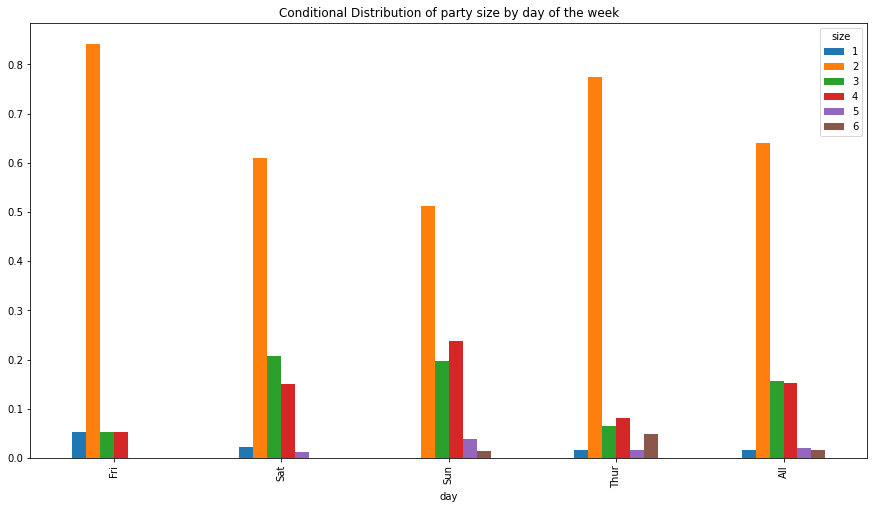

In [66]:
pd.crosstab(index=tips['day'],
           columns=tips['size'],
           normalize='index',
           margins=True).plot(kind='bar',
                              figsize=(15,8),
                              title='Conditional Distribution of party size by day of the week')

#### Visualization of Conditional Distribution of party size by day of the week - Stacked Column Chart

<AxesSubplot:title={'center':'Conditional Distribution of party size by day of the week'}, xlabel='day'>

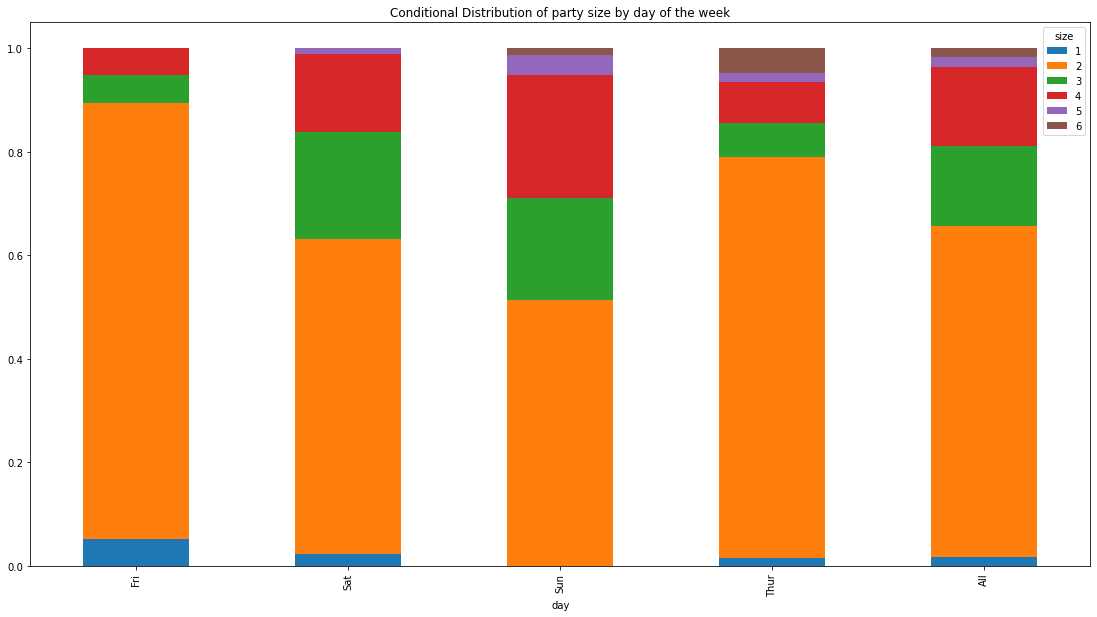

In [86]:
pd.crosstab(index=tips['day'],
           columns=tips['size'],
           normalize='index',
           margins=True).plot(kind='bar',
                              figsize=(19,10),
                              stacked=True,
                              title='Conditional Distribution of party size by day of the week')